In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

## Precipitation data

Data from https://www.ncei.noaa.gov/

In [2]:
token = 'aINGVmYtICYnUyESWudUYnpFddVJacPt'

In [4]:
url = 'https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=PRECIP_HLY&stationid=COOP:406402&startdate=2004-01-01&enddate=2004-06-30&limit=1000'

r = requests.get(url, headers={'token':token})
json_data = r.json()

In [5]:
precip = pd.DataFrame(json_data['results'])

In [6]:
precip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        678 non-null    object
 1   datatype    678 non-null    object
 2   station     678 non-null    object
 3   attributes  678 non-null    object
 4   value       678 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 26.6+ KB


In [10]:
precip.shape

(678, 5)

In [19]:
def request_precip(dates):
    url = f'https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=PRECIP_HLY&stationid=COOP:406402&startdate={dates[0]}&enddate={dates[1]}&limit=1000'

    r = requests.get(url, headers={'token':token})
    json_data = r.json()
    
    temp = pd.DataFrame(json_data['results'])
    print(temp.shape)
    
    return temp
    

In [34]:
dates = [['2004-01-01', '2004-06-30'], ['2004-07-01', '2004-12-31'], 
         ['2005-01-01', '2005-06-30'], ['2005-07-01', '2005-12-31'], 
        ['2006-01-01', '2006-06-30'], ['2006-07-01', '2006-12-31'], 
        ['2007-01-01', '2007-06-30'], ['2007-07-01', '2007-12-31'], 
        ['2008-01-01', '2008-06-30'], ['2008-07-01', '2008-12-31'], 
        ['2009-01-01', '2009-06-30'], ['2009-07-01', '2009-12-31'], 
        ['2010-01-01', '2010-06-30'], ['2010-07-01', '2010-12-31'], 
        ['2011-01-01', '2011-06-30'], ['2011-07-01', '2011-12-31'], 
        ['2012-01-01', '2012-06-30'], ['2012-07-01', '2012-12-31'], 
        ['2013-01-01', '2013-06-30'], ['2013-07-01', '2013-12-31']]


In [35]:
precip = pd.DataFrame()

for date in dates:
    temp = request_precip(date)
    precip = precip.append(temp)

(678, 5)
(574, 5)
(601, 5)
(338, 5)
(558, 5)
(446, 5)
(411, 5)
(410, 5)
(520, 5)
(386, 5)
(549, 5)
(513, 5)
(619, 5)
(391, 5)
(615, 5)
(466, 5)
(409, 5)
(431, 5)
(594, 5)
(490, 5)


In [36]:
precip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 489
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        9999 non-null   object
 1   datatype    9999 non-null   object
 2   station     9999 non-null   object
 3   attributes  9999 non-null   object
 4   value       9999 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 468.7+ KB


In [37]:
precip.head()

,date,datatype,station,attributes,value
0,2004-01-01T01:00:00,HPCP,COOP:406402,"g,",0
1,2004-01-01T11:00:00,HPCP,COOP:406402,"T,",0
2,2004-01-01T12:00:00,HPCP,COOP:406402,"T,",0
3,2004-01-02T00:00:00,HPCP,COOP:406402,"T,",0
4,2004-01-02T01:00:00,HPCP,COOP:406402,",",10


In [38]:
precip['attributes'].value_counts()

,        4073
T,       3503
,,HI     1423
T,,HI     889
g,         85
g,,HI      26
Name: attributes, dtype: int64

In [39]:
precip['date'] = pd.to_datetime(precip['date'])

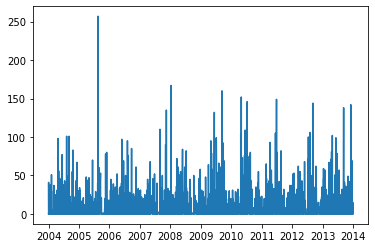

In [40]:
plt.plot(precip['date'], precip['value']);

## Rain Gage data